In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

os.makedirs('outputs', exist_ok=True)

# Bar Plot

In [2]:
barplot_data = pd.read_csv('dataset/barplot.csv')
barplot_data

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5
0,81,11,67,14,20


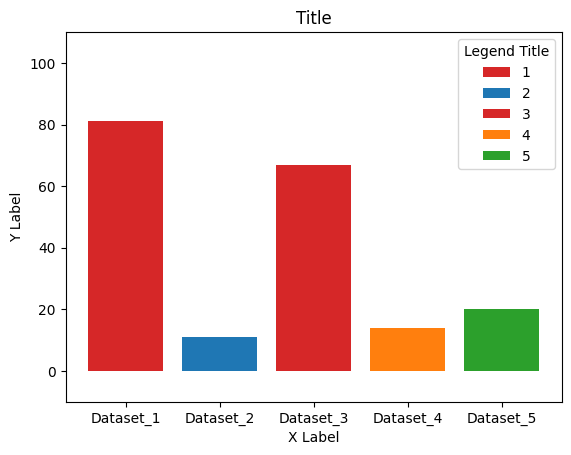

In [3]:
fig, ax = plt.subplots()

bar_labels = ['1', '2', '3', '4', '5']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:green']

ax.bar(barplot_data.columns, barplot_data.loc[0], label=bar_labels, color=bar_colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.legend(title='Legend Title')
ax.set_ylim(-10, 110)

plt.savefig('outputs/barplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
grouped_barplot_data = pd.read_csv('dataset/grouped_barplot.csv')
grouped_barplot_data

,A,B,C
0,4,65,54
1,87,24,66
2,66,73,91


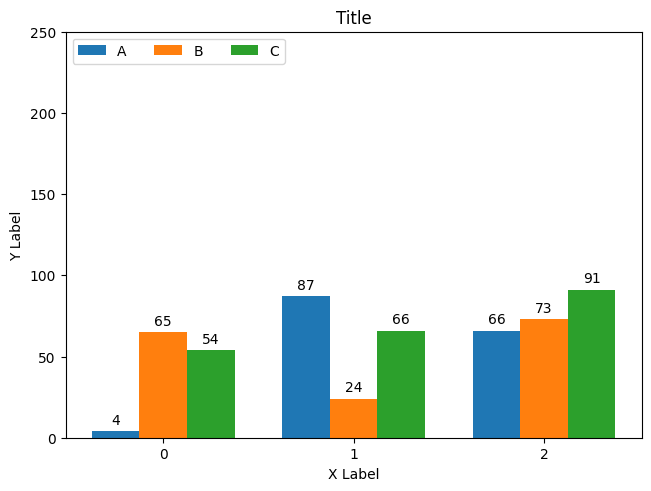

In [5]:
columns = grouped_barplot_data.index
data = dict()
for index, column in enumerate(grouped_barplot_data.columns):
    data[column] = grouped_barplot_data[column]

x = np.arange(len(columns))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.set_xticks(x + width, columns)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.savefig('outputs/grouped_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Signal Plot

In [6]:
signal_data = pd.read_csv('dataset/signal_plot.csv')
signal_data.head()

,X,Y
0,0.00000,0.187576
1,0.10101,0.110768
2,0.20202,0.204066
3,0.30303,0.264139
4,0.40404,0.348790


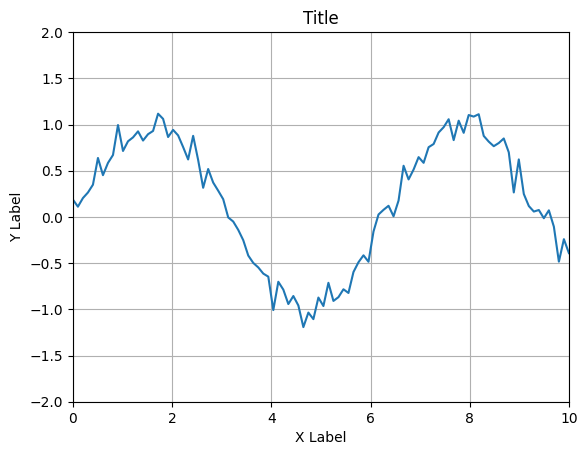

In [7]:
t = signal_data['X']
s = signal_data['Y']

fig, ax = plt.subplots()
ax.plot(t, s, label='Signal', color='tab:blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
ax.grid()

plt.savefig('outputs/signal_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
multi_signal_data = pd.read_csv('dataset/multiple_signal_plot.csv')
multi_signal_data.head()

,X,Y1,Y2
0,0.00000,0.049021,1.101573
1,0.10101,0.160488,0.848501
2,0.20202,0.093234,0.962622
3,0.30303,0.251161,1.002246
4,0.40404,0.458034,0.845648


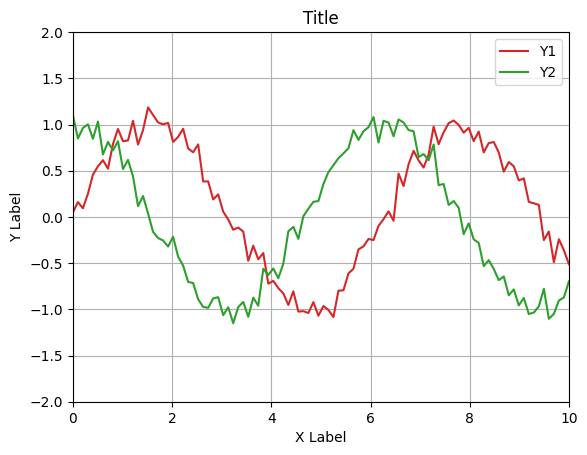

In [9]:
t = multi_signal_data['X']
s1 = multi_signal_data['Y1']
s2 = multi_signal_data['Y2']

fig, ax = plt.subplots()
ax.plot(t, s1, label='Y1', color='tab:red')
ax.plot(t, s2, label='Y2', color='tab:green')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.set_xlim(0, 10)
ax.set_ylim(-2, 2)
ax.grid()
ax.legend()

plt.savefig('outputs/multiple_signal_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Heatmap

In [10]:
heatmap_data = pd.read_csv('dataset/heatmap.csv')
heatmap_data.head()

,Column_1,Column_2,Column_3,Column_4,Column_5
0,38,8,7,20,82
1,95,78,41,84,31
2,59,80,72,69,49
3,8,23,90,53,0
4,98,84,45,73,67


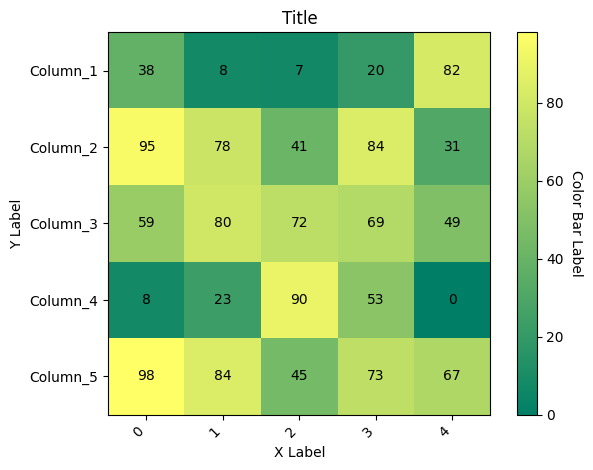

In [11]:
columns = heatmap_data.columns
index = heatmap_data.index

np_data = np.array(heatmap_data)

fig, ax = plt.subplots()
im = ax.imshow(np_data, cmap="summer")  # color map
# viridis, plasma, inferno, magma, cividis, seismic, cool, spring, summer, autumn, winter, gray, bone, pink, hot, afmhot, gist_heat, copper

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(index)), labels=index)
ax.set_yticks(np.arange(len(columns)), labels=columns)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(),
    rotation=45, # rotation of the labels
    ha="right", # horizontal alignment
)

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(index)):
        text = ax.text(
            j, i, np_data[i, j], ha="center", va="center", color="black"
        )  # color of the text

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Color Bar Label", rotation=-90, va="bottom")

ax.set_title("Title")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
fig.tight_layout()
plt.savefig('outputs/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Histogram

In [12]:
histogram_data = pd.read_csv('dataset/histogram.csv')
histogram_data.head()

,Value
0,53.749053
1,31.573282
2,29.629120
3,43.524464
4,67.516343


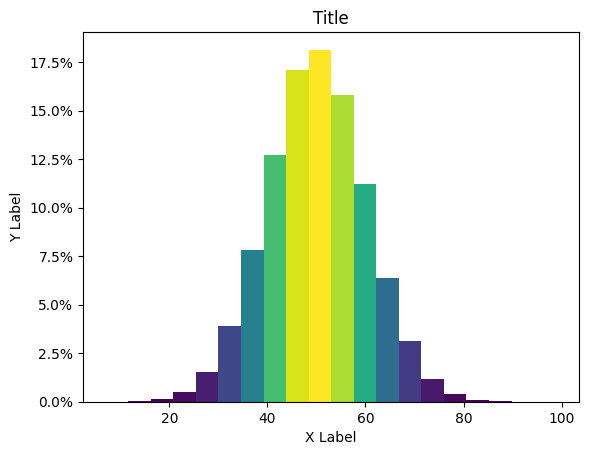

In [13]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 20

# Generate two normal distributions
dist = histogram_data['Value']

axs = plt.subplot()

# We can set the number of bins with the *bins* keyword argument.
N, bins, patches = axs.hist(dist, bins=n_bins)
axs.set_xlabel('X Label')
axs.set_ylabel('Y Label')
axs.set_title('Title')

axs.yaxis.set_major_formatter(PercentFormatter(xmax=len(dist)))

fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.savefig('outputs/histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Scatter Plot

In [14]:
scatter_data = pd.read_csv('dataset/scatterplot.csv')
scatter_data.head()

,X,Y
0,24,94
1,99,47
2,68,66
3,15,9
4,47,28


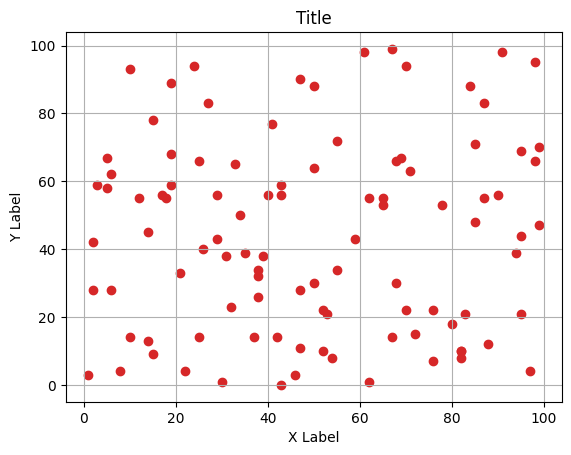

In [15]:
ax = plt.subplot()
ax.scatter(scatter_data['X'], scatter_data['Y'], label='Scatter Plot', color='tab:red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.grid()

plt.savefig('outputs/scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

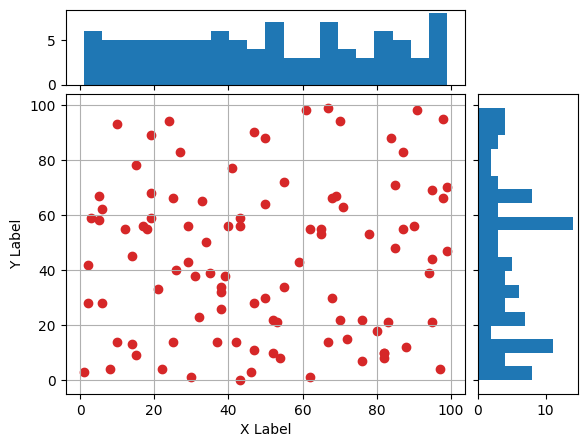

In [16]:
bins = 20
fig = plt.figure()

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax.scatter(scatter_data['X'], scatter_data['Y'], label='Scatter Plot', color='tab:red')
ax_histx.hist(scatter_data['X'], bins=bins)
ax_histy.hist(scatter_data['Y'], bins=bins, orientation='horizontal')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.grid()

plt.savefig('outputs/scatterplot_with_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
categorical_scatter_data = pd.read_csv('dataset/categorical_scatterplot.csv')
categorical_scatter_data.head()

,X,Y,Category
0,2,89,red
1,89,0,green
2,36,1,blue
3,25,46,red
4,52,12,red


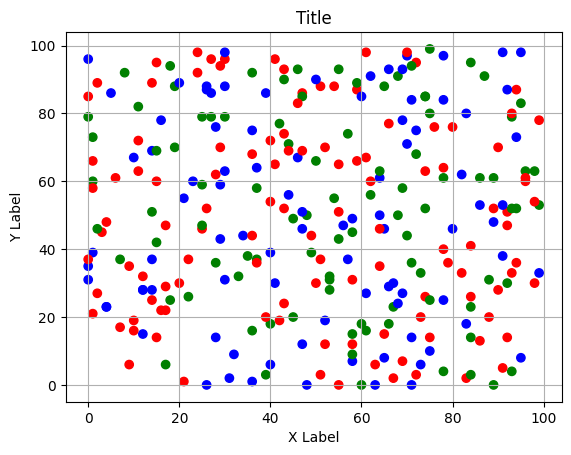

In [18]:
ax = plt.subplot()
ax.scatter(categorical_scatter_data['X'], categorical_scatter_data['Y'], c=categorical_scatter_data['Category'])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')
ax.grid()

plt.savefig('outputs/categorical_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()